In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from os.path import join, expanduser

In [2]:
src_dir = join(expanduser('~'), '.alembic/neuroglancer/pinky100_v0/father_of_alignment_v5/match')

In [114]:
def parse_fn(fn):
    split = fn.split(', ')
    return int(split[0][1:]), int(split[1][:-1])

def get_depth(fn):
    return parse_fn(fn)[1] - parse_fn(fn)[0]

def get_src_index(fn):
    return parse_fn(fn)[0]

def sort_df(df, key):
    '''Takes dataframe, column index and custom function for sorting, 
    returns dataframe sorted by this column using this function'''
    
    col = df.ix[:,column_idx]
    temp = pd.DataFrame([])
    temp[0] = col
    temp[1] = df.index
    temp = temp.values.tolist()
    df = df.ix[[i[1] for i in sorted(temp, key=key)]]
    
    return df

In [77]:
from random import shuffle
x = [i for i in range(100)]
shuffle(x)

In [57]:
files = os.listdir(src_dir)
files = sorted(files, key=get_src_index)

In [14]:
cols = ['patches_src_normalized_dyn_range', 'patches_src_kurtosis',
       'patches_dst_kurtosis', 'xcorr_r_max', 'xcorr_delta_5',
       'xcorr_delta_10', 'xcorr_delta_15', 'xcorr_sigma_0.5',
       'xcorr_sigma_0.75', 'xcorr_sigma_0.95', 'vects_norm', 'filter']

In [58]:
stacks = []
for fn in files[:100]:
    df = pd.read_csv(join(src_dir, fn))
    df['filter'] = df['filter'].astype(bool)
    df['id'] = fn
    stacks.append(df)
df = pd.concat(stacks, ignore_index=True)

In [59]:
accepted_df = df[df['filter']]
rejected_df = df[~df['filter']]

In [60]:
accepted_grouped = accepted_df.groupby('id')

In [61]:
accepted_stats = accepted_grouped.describe()

In [115]:
accepted_stats['depth'] = [get_depth(i) for i in accepted_stats.index]

In [117]:
accepted_stats_1 = accepted_stats[accepted_stats['depth'] == 1]
accepted_stats_2 = accepted_stats[accepted_stats['depth'] == 2]

In [118]:
def plot_quantiles(df, k):
    f = plt.figure(figsize=(16,8))
    df[(k, 'max')].plot()
    df[(k, '75%')].plot()
    df[(k, '50%')].plot()
    df[(k, '25%')].plot()
    df[(k, 'min')].plot()
    df[(k, 'std')].plot()
    plt.legend()
    plt.show()

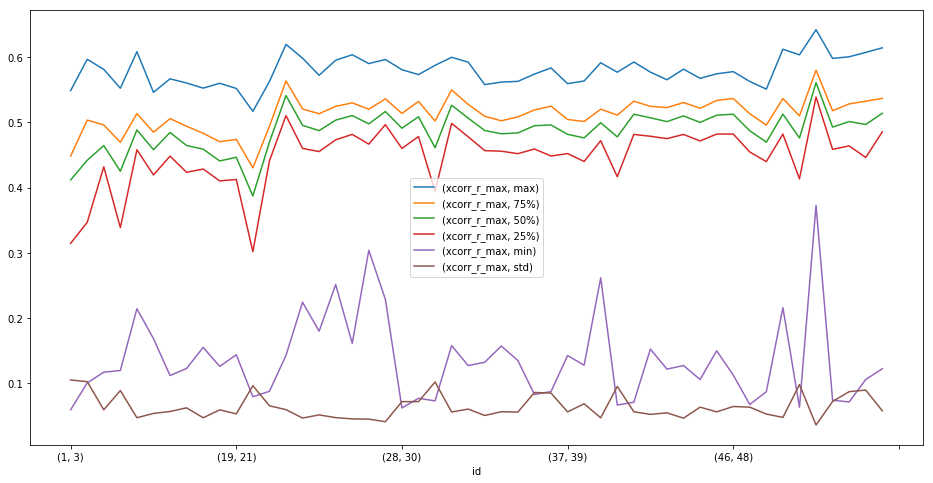

In [121]:
plot_quantiles(accepted_stats_2, 'xcorr_r_max')

In [155]:

for fn in files:
    df = pd.read_csv(join(src_dir, fn), index_col=0)
    src, dst = parse_fn(fn)
    df['name'] = fn
    df['src'] = src
    df['dst'] = dst
    stacks.append(df.stack())
d = pd.concat(stacks, axis=1).transpose()
d = d.set_index(('xcorr_r_max', 'name'))
d.index.rename('name', inplace=True)

In [183]:
d.index[d['xcorr_delta_15']['accepted'] < 5]

Index(['(100, 101)', '(100, 102)', '(101, 102)', '(1023, 1024)',
       '(1023, 1025)', '(1024, 1025)', '(1024, 1026)', '(1025, 1026)',
       '(1026, 1028)', '(1028, 1030)',
       ...
       '(929, 930)', '(95, 96)', '(96, 97)', '(96, 98)', '(965, 967)',
       '(97, 99)', '(98, 100)', '(98, 99)', '(99, 100)', '(99, 101)'],
      dtype='object', name='name', length=235)

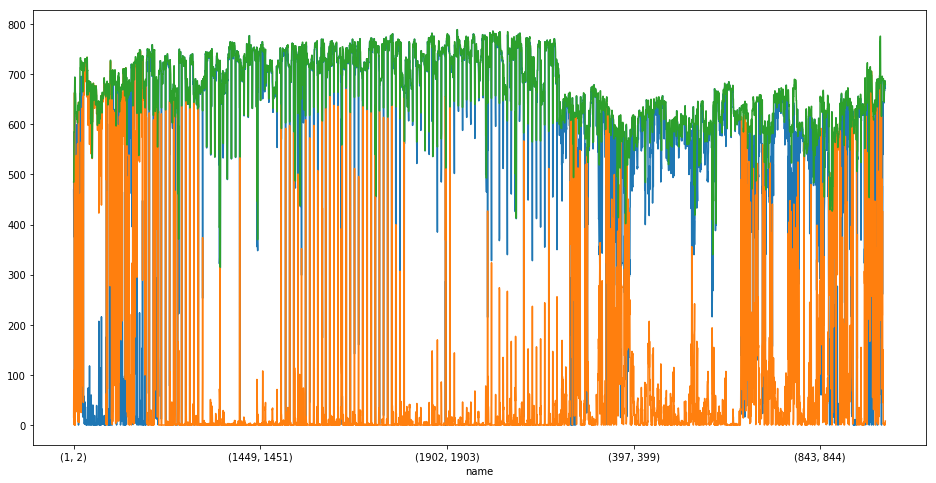

In [186]:
f = plt.figure(figsize=(16,8))
d['xcorr_delta_15']['accepted'].plot()
d['xcorr_delta_15']['rejects'].plot()
(d['xcorr_delta_15']['accepted'] + d['xcorr_delta_15']['rejects']).plot()
plt.show()

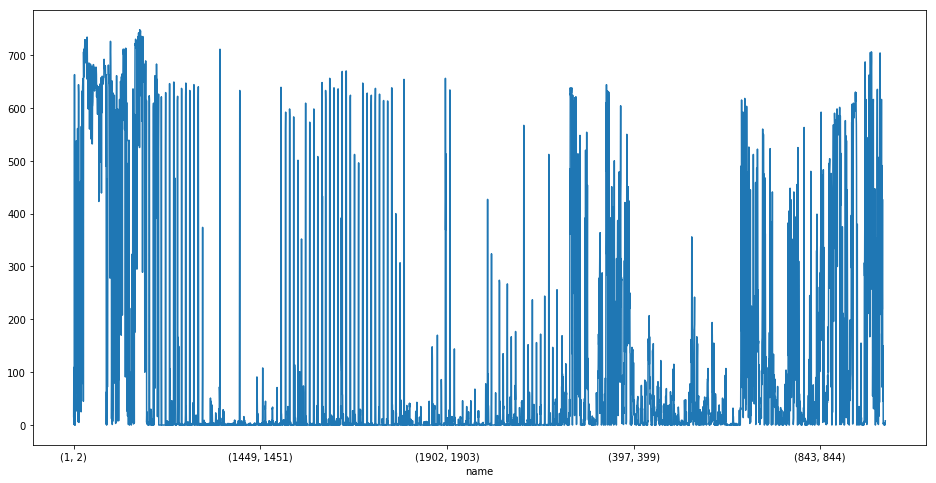

In [184]:
f = plt.figure(figsize=(16,8))
d['xcorr_delta_15']['rejects'].plot()
plt.show()

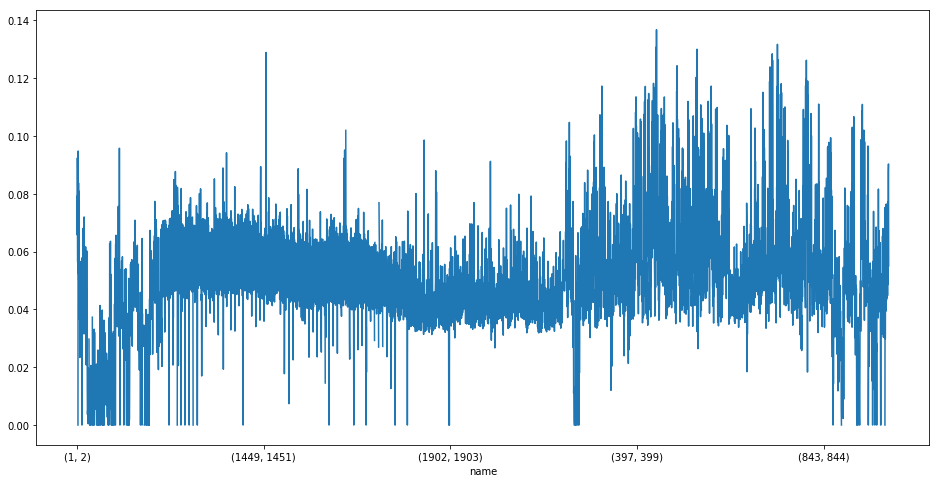

In [181]:
f = plt.figure(figsize=(16,8))
d['xcorr_delta_15']['std'].plot()
# d['xcorr_delta_15']['std'][d['xcorr_delta_15']['accepted'] > 0].plot()
plt.show()